# Part II - (Loan Data from Prosper)
## by Chia-Hung Lee

## Investigation Overview


> In this investigation, we will delve into the variables that may impact a borrower's APR. Our primary focus will be on the initial loan amount, ProsperRating (Alpha), and Loan Term.




## Dataset Overview and Executive Summary

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('Loan-Data-from-Prosper.csv')

rating_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
ordered = pd.CategoricalDtype(ordered=True, categories=rating_order)
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].astype(ordered)
df['ProsperRating (Alpha)'].dtypes

CategoricalDtype(categories=['AA', 'A', 'B', 'C', 'D', 'E', 'HR'], ordered=True)

## Borrower APR

>- **Higher BorrowerAPR** indicates a greater interest rate on borrowed funds, resulting in increased interest payments.
>- In the distribution plot of BorrowerAPR, there is a prominent peak around 0.09, 0.23, 0.25, 0.27, 0.29, a minor peak at approximately 0.18, and a significant peak around 0.36. Very few individuals have an APR exceeding 0.4.

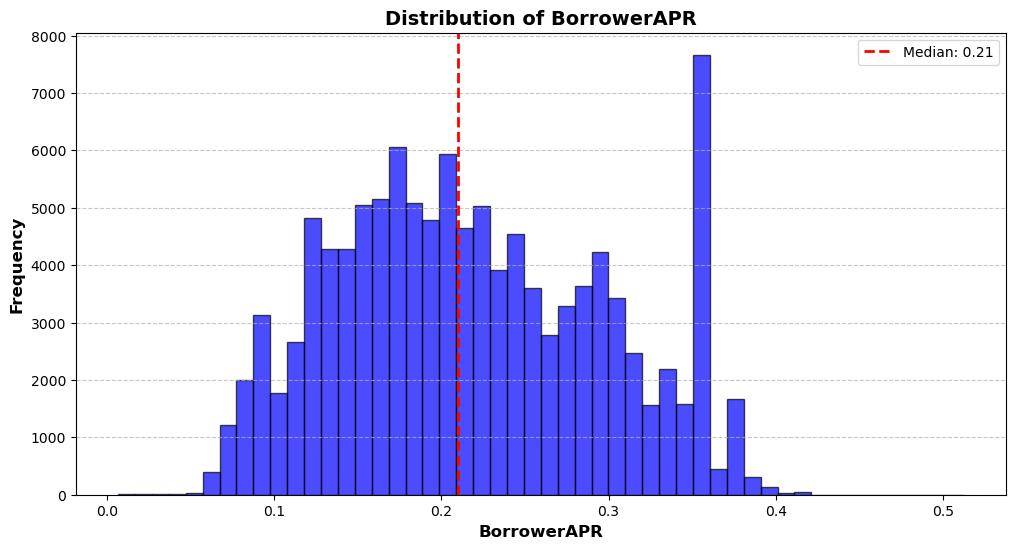

In [3]:
fig, ax = plt.subplots(figsize=[12,6])

# Plot the histogram
ax.hist(df['BorrowerAPR'], bins=50, edgecolor='black', color='Blue', alpha=0.7)

# Add a vertical line for the median
median = df['BorrowerAPR'].median()
ax.axvline(median, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')

# Add title and format it 
ax.set_title(f'Distribution of BorrowerAPR', fontsize=14, weight="bold")

# Add X and Y labels and format them 
ax.set_xlabel('BorrowerAPR', fontsize=12, weight="bold")
ax.set_ylabel('Frequency', fontsize=12, weight="bold")

# Add grid lines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend for the median line
ax.legend(loc='upper right')

plt.show()   

## Original Loan Amount


>- The highest loan frequency is around `$4,000`, followed by `$15,000` and `$10,000`, with additional peaks at `$2,000` and `$5,000`.


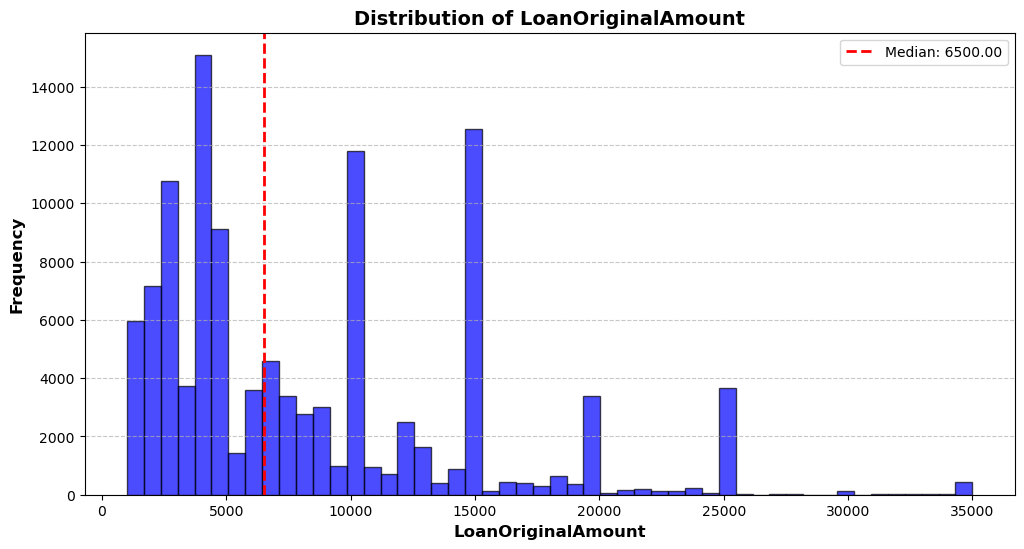

In [4]:

# Create the figure and axes
fig, ax = plt.subplots(figsize=[12,6])

# Plot the histogram
ax.hist(df['LoanOriginalAmount'], bins=50, edgecolor='black', color='Blue', alpha=0.7)

# Add a vertical line for the median
median = df['LoanOriginalAmount'].median()
ax.axvline(median, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')

# Add title and format it 
ax.set_title(f'Distribution of LoanOriginalAmount', fontsize=14, weight="bold")

# Add X and Y labels and format them 
ax.set_xlabel('LoanOriginalAmount', fontsize=12, weight="bold")
ax.set_ylabel('Frequency', fontsize=12, weight="bold")

# Add grid lines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend for the median line
ax.legend(loc='upper right')

plt.show()   

## ProsperRating

>- The most common ratings are C, B, A, and D

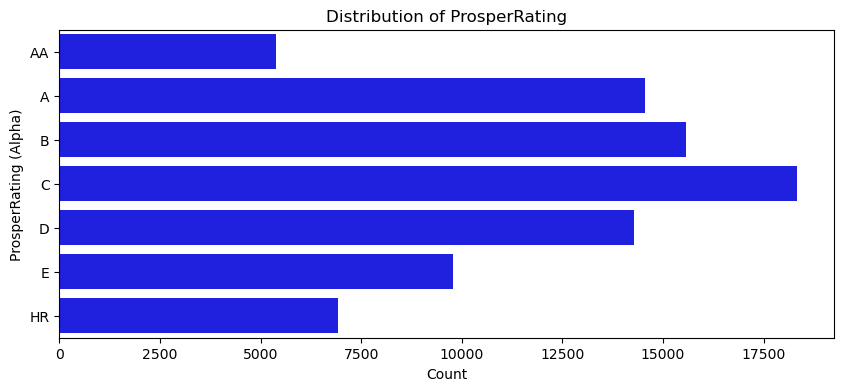

In [5]:
rating_order=['AA','A','B','C','D','E','HR']


# Plot a horizontal bar chart for the distribution of LoanStatus
plt.figure(figsize=[10, 4])  

ratings = df['ProsperRating (Alpha)'].value_counts()
sns.barplot(x=ratings, y=ratings.index, color='Blue', order=rating_order)  # Use 'green' color

plt.xlabel('Count')  # Label for the x-axis
plt.ylabel('ProsperRating (Alpha)')  # Label for the y-axis
plt.title('Distribution of ProsperRating')  # Title for the plot

plt.show()  # Display the plot

## Borrower APR vs. Original Loan Amount

>- There is a negative relationship between borrower APR and the original loan amount, meaning that as the loan amount increases, the APR tends to decrease.

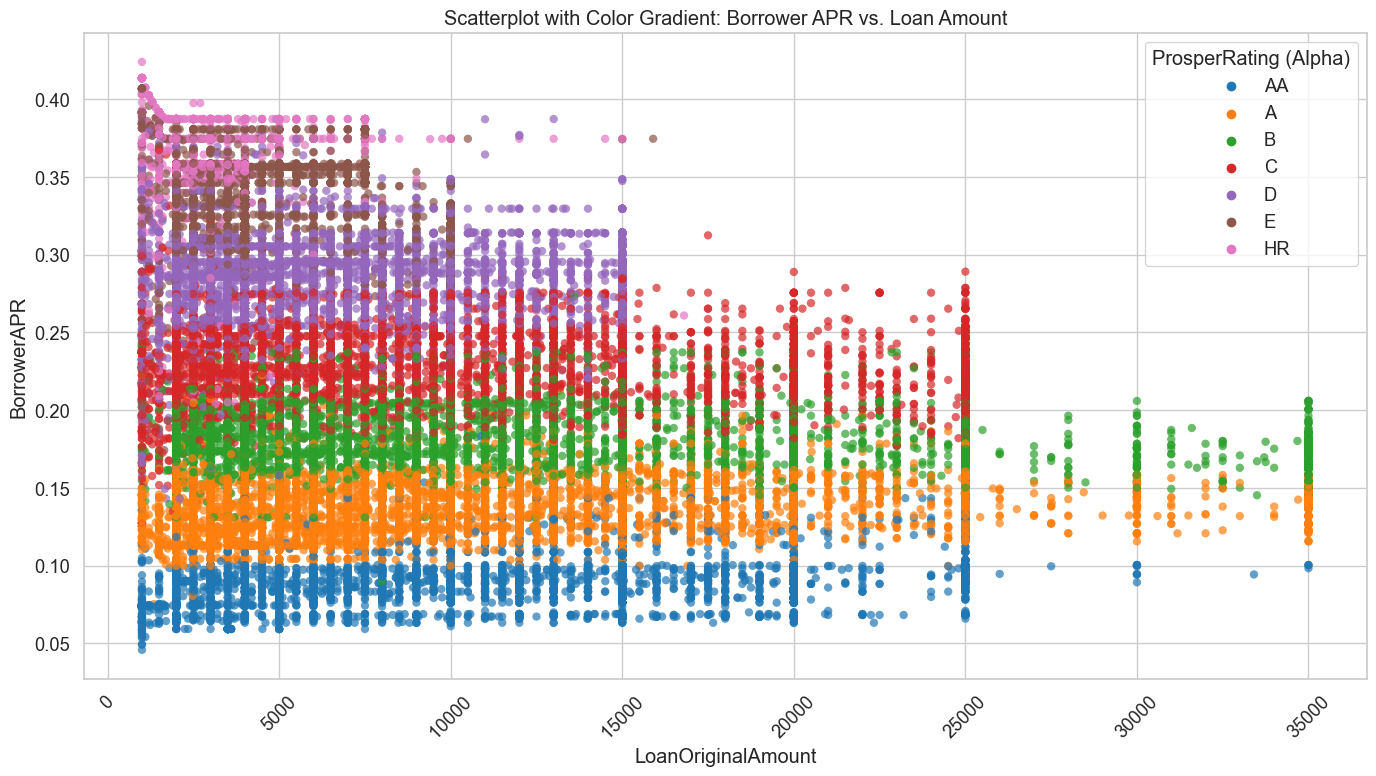

In [6]:
# Set the style and context for the plots
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create a violin plot to show the distribution of LoanOriginalAmount by ProsperRating (Alpha)
rating_order=['AA','A','B','C','D','E','HR']

plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='LoanOriginalAmount', y='BorrowerAPR',hue='ProsperRating (Alpha)',
               alpha=0.7, edgecolor='none')

plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerAPR')
plt.title('Scatterplot with Color Gradient: Borrower APR vs. Loan Amount')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

## Borrower APR by Loan Term and ProsperRating (Alpha)

- For AA-B ratings, the APR tends to increase with longer loan terms.
- Conversely, for C-HR ratings, the APR generally decreases with longer loan terms.

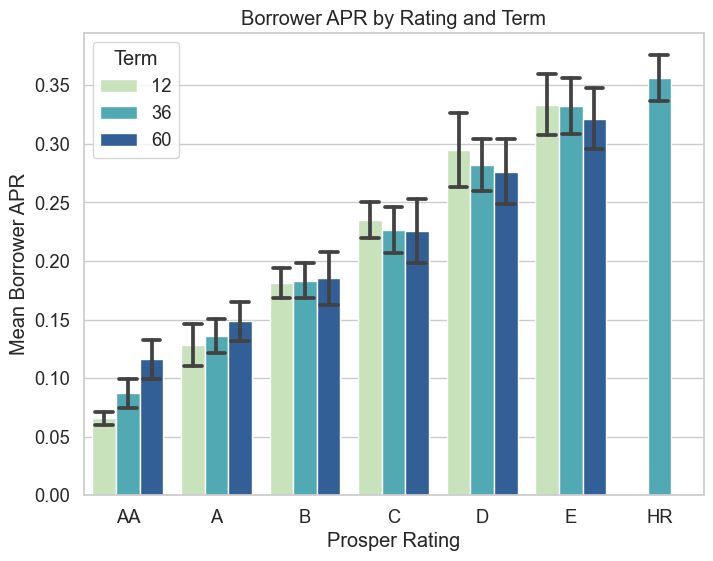

In [7]:
# Create a figure for the point plot
fig = plt.figure(figsize=[8, 6])

# Create a point plot to visualize Borrower APR across Prosper Rating and Loan Term
sns.barplot(data=df, x='ProsperRating (Alpha)', y='BorrowerAPR', hue='Term', order=rating_order,
              palette='YlGnBu', errorbar='sd', capsize=0.2)

# Set the title and labels for the plot
plt.title('Borrower APR by Rating and Term')
plt.ylabel('Mean Borrower APR')
plt.xlabel('Prosper Rating');